<a href="https://colab.research.google.com/github/Archittyagi101/projects/blob/main/ML_Lab_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.**

In [ ]:
import pandas as pd
import csv
import numpy as np
import math

In [ ]:
data = pd.DataFrame(data=pd.read_csv('/content/ws.csv'))
print(data)

   Sunny  Warm Normal  Strong Warm.1    Same  Yes
0  Sunny  Warm   High  Strong   Warm    Same  Yes
1  Rainy  Cold   High  Strong   Warm  Change   No
2  Sunny  Warm   High  Strong   Cool  Change  Yes


In [ ]:
def find_s_algorithm(training_data):
    hypothesis = ["0"] * (len(training_data[0]) - 1)

    for example in training_data:
        if example[-1] == "Yes":
            for i in range(len(example) - 1):
                if hypothesis[i] == "0":
                    hypothesis[i] = example[i]
                elif hypothesis[i] != example[i]:
                    hypothesis[i] = "?"

    return hypothesis

def read_csv_file(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    return data

file_path = '/content/ws.csv'
training_data = read_csv_file(file_path)


hypothesis = find_s_algorithm(training_data)
print("The most specific hypothesis is:", hypothesis)



The most specific hypothesis is: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


**2.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.**

In [ ]:
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):


    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):

        if target[i] == "Yes":
            for x in range(len(specific_h)):

                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")


Initialization of specific_h and general_h
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

Steps of Candidate Elimination Algorithm 3
['Sunny' 'Warm' 'High' 'Strong' '?' '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?

**3. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**

In [ ]:
def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)

    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1

    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)

    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0

    counts = np.zeros((items.shape[0], 1))
    sums = 0

    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)

    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))

    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)

    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)

    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]

    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node

    gains = np.zeros((data.shape[1] - 1, 1))

    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)

    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)

    items, dict = subtables(data, split, delete=True)

    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))

    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

metadata, traindata = read_data("/content/tennisdata.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Outlook
    Overcast
       b'Yes'
    Rainy
       Windy
          b'False'
             b'Yes'
          b'True'
             b'No'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


**4.Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.**

In [ ]:
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100

class Neural_Network(object):
    def __init__(self):

        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)

    def forward(self, X):
        self.z = np.dot(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    def sigmoidPrime(self, s):
        return s * (1 - s)

    def backward(self, X, y, o):

        self.o_error = y - o
        self.o_delta = self.o_error*self.sigmoidPrime(o)
        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2)
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)
    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)


NN = Neural_Network()
for i in range(1000):
    print ("\nInput: \n" + str(X))
    print ("\nActual Output: \n" + str(y))
    print ("\nPredicted Output: \n" + str(NN.forward(X)))
    print ("\nLoss: \n" + str(np.mean(np.square(y - NN.forward(X)))))
    NN.train(X, y)

Streaming output truncated to the last 5000 lines.
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89166155]
 [0.8804392 ]
 [0.89880532]]

Loss: 
0.0004327874405831437

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.891668  ]
 [0.88043441]
 [0.89880055]]

Loss: 
0.0004325723334463443

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89167445]
 [0.88042963]
 [0.89879578]]

Loss: 
0.00043235739673680223

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89168089]
 [0.88042484]
 [0.89879101]]

Loss: 
0.0004321426302760921

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


**5. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.**

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# load data from CSV
data = pd.read_csv('tennisdata.csv')
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# Convert then in numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

classifier = GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

Accuracy is: 0.3333333333333333


**6. Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.**

In [ ]:
msg = pd.read_csv('document.csv', names=['message', 'label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})
X = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()
Xtrain_dm = count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)

for doc, p in zip(Xtrain, pred):
    p = 'pos' if p == 1 else 'neg'
    print("%s -> %s" % (doc, p))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, pred))

Total Instances of Dataset:  18
This is an awesome place -> neg
This is my best work -> pos
I love to dance -> neg
I feel very good about these beers -> pos
I am tired of this stuff -> neg
Accuracy Metrics: 

Accuracy:  0.8
Recall:  1.0
Precision:  0.5
Confusion Matrix: 
 [[3 1]
 [0 1]]


**7. Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API.**

In [ ]:
data=pd.read_csv("heartdisease.csv")
heart_disease=pd.DataFrame(data)

from pgmpy.models import BayesianModel
model=BayesianModel([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('diet','cholestrol')
])

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)

print('For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }')
print('For Gender Enter { Male:0, Female:1 }')
print('For Family History Enter { yes:1, No:0 }')
print('For diet Enter { High:0, Medium:1 }')
print('For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }')
print('For cholesterol Enter { High:0, BorderLine:1, Normal:2 }')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('Enter age :')),
    'Gender':int(input('Enter Gender :')),
    'Family':int(input('Enter Family history :')),
    'diet':int(input('Enter diet :')),
    'Lifestyle':int(input('Enter Lifestyle :')),
    'cholestrol':int(input('Enter cholestrol :'))
    })

print(q)

For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }
For Gender Enter { Male:0, Female:1 }
For Family History Enter { yes:1, No:0 }
For diet Enter { High:0, Medium:1 }
For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }
For cholesterol Enter { High:0, BorderLine:1, Normal:2 }
Enter age :1
Enter Gender :1
Enter Family history :0
Enter diet :1
Enter Lifestyle :0
Enter cholestrol :1


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


**8. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data et for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/python ML library classes/API in the program**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import matplotlib.pyplot as plt

dataset=load_iris()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'GMM Classification')

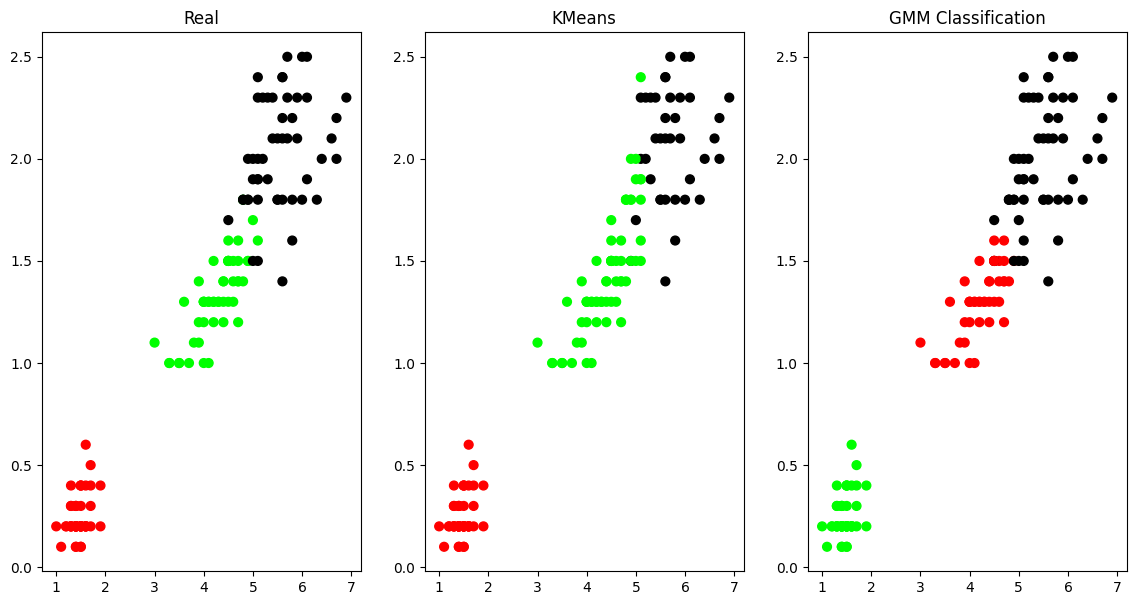

In [ ]:
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

**9.Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],random_state=0)

kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
    prediction=kn.predict(x_new)
    print("TARGET=",y_test[i],dataset["target_names"][y_test[i]],"PREDICTED=",prediction,dataset["target_names"][prediction])
print(kn.score(X_test,y_test))


TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] [

**10. Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.**

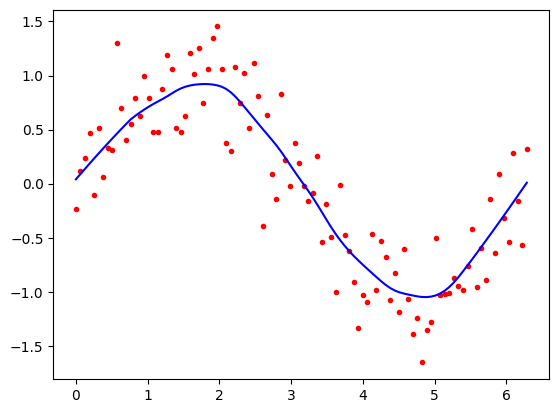

In [ ]:
from math import ceil
from scipy import linalg

def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest


n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f =0.25
iterations=3
yest = lowess(x, y, f, iterations)

import matplotlib.pyplot as plt
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")